# Métricas de actividad

En este Notebook crearé, gracias a mis datos obtenidos de Google un análisis de mi actividad, cabe destacar, que yo no dispongo de banda fidíca, si dispones de una de ellas, el análisis y luego el modelo predictivo sera mucho mejor y más preciso.

In [183]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


### Creamos el DataFrame

In [4]:
# Ruta al archivo Excel
csv_file_path = r"C:\Users\sergi\Desktop\maps\Fit\Métricas de actividad diaria\Métricas de actividad diaria.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(csv_file_path)

#Mostramos el resultado
df.head()

,Fecha,Recuento de Minutos Activos,Calorías (kcal),Distancia (m),Puntos Cardio,Minutos de cardio,Latitud baja (grados),Longitud baja (grados),Latitud alta (grados),Longitud alta (grados),...,Velocidad mínima (m/s),Recuento de pasos,Peso medio (kg),Peso máximo (kg),Peso mínimo (kg),Bicicleta duración (ms),Inactivo duración (ms),Andar duración (ms),Correr duración (ms),Correr duración (ms).1
0,2023-03-18,NaN,0.034306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.0,95.0,95.0,NaN,NaN,NaN,NaN,NaN
1,2023-07-27,NaN,1784.500030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-07-28,267.0,1967.615444,14153.293786,87.0,56.0,NaN,NaN,NaN,NaN,...,0.244837,18362.0,NaN,NaN,NaN,NaN,NaN,2299756.0,NaN,NaN
3,2023-07-29,353.0,2383.198122,15731.670083,59.0,59.0,NaN,NaN,NaN,NaN,...,0.240238,23747.0,NaN,NaN,NaN,NaN,NaN,7519080.0,NaN,NaN
4,2023-07-30,266.0,2134.682148,12441.850939,56.0,55.0,NaN,NaN,NaN,NaN,...,0.251058,18658.0,NaN,NaN,NaN,NaN,NaN,4397957.0,NaN,NaN


In [41]:
# Directorio donde se encuentran los archivos JSON
directorio = r"C:\Users\sergi\Desktop\maps\Fit\Todas las sesiones"

# Lista para almacenar todos los datos
datos_totales = []

# Recorrer archivos en el directorio
for filename in os.listdir(directorio):
    if filename.endswith('.json'):
        # Construir la ruta completa del archivo
        archivo_json = os.path.join(directorio, filename)

        # Leer el archivo JSON
        with open(archivo_json, 'r') as file:
            data = json.load(file)

        # Agregar datos a la lista
        datos_totales.append(data)

# Convertir la lista de datos a un DataFrame
df_actividades = pd.DataFrame(datos_totales)
df_actividades.head()

,fitnessActivity,startTime,endTime,duration,segment,aggregate
0,walking,2023-07-28T18:36:27.084Z,2023-07-28T19:00:09.551Z,1422.467s,"[{'fitnessActivity': 'walking', 'startTime': '...",[{'metricName': 'com.google.calories.expended'...
1,walking,2023-07-28T22:05:43.594Z,2023-07-28T22:27:23.618Z,1300.024s,"[{'fitnessActivity': 'walking', 'startTime': '...",[{'metricName': 'com.google.heart_minutes.summ...
2,walking,2023-07-29T08:29:12.629Z,2023-07-29T08:44:33.640Z,921.011s,"[{'fitnessActivity': 'walking', 'startTime': '...",[{'metricName': 'com.google.heart_minutes.summ...
3,walking,2023-07-29T10:07:18.046Z,2023-07-29T10:29:49.956Z,1351.910s,"[{'fitnessActivity': 'walking', 'startTime': '...",[{'metricName': 'com.google.calories.expended'...
4,walking,2023-07-29T11:15:08.824Z,2023-07-29T11:29:25.635Z,856.811s,"[{'fitnessActivity': 'walking', 'startTime': '...",[{'metricName': 'com.google.heart_minutes.summ...


### Información del DataFrame

In [5]:
df.describe()

,Recuento de Minutos Activos,Calorías (kcal),Distancia (m),Puntos Cardio,Minutos de cardio,Latitud baja (grados),Longitud baja (grados),Latitud alta (grados),Longitud alta (grados),Velocidad media (m/s),...,Velocidad mínima (m/s),Recuento de pasos,Peso medio (kg),Peso máximo (kg),Peso mínimo (kg),Bicicleta duración (ms),Inactivo duración (ms),Andar duración (ms),Correr duración (ms),Correr duración (ms).1
count,96.000000,101.000000,96.000000,84.000000,84.000000,22.000000,22.000000,22.000000,22.000000,96.000000,...,96.000000,97.000000,1.0,1.0,1.0,1.0,1.0,9.200000e+01,1.000000e+01,1.0
mean,138.697917,2104.330928,7502.410770,61.357143,50.333333,40.324786,-3.888875,40.361203,-3.811169,0.566488,...,0.230051,10813.762887,95.0,95.0,95.0,600000.0,10034.0,4.431094e+06,9.603079e+05,3201024.0
std,97.080338,385.908329,4728.922234,41.397760,30.630850,0.009409,0.007463,0.044417,0.095741,0.167456,...,0.065597,6739.405231,NaN,NaN,NaN,NaN,NaN,3.080246e+06,1.519143e+06,NaN
min,2.000000,0.034306,122.390974,1.000000,1.000000,40.309650,-3.908125,40.328804,-3.903354,0.293006,...,0.010051,185.000000,95.0,95.0,95.0,600000.0,10034.0,3.921800e+04,8.599600e+04,3201024.0
25%,72.000000,1892.110661,3585.915151,30.750000,28.500000,40.318406,-3.893006,40.329500,-3.881259,0.486971,...,0.245687,5348.000000,95.0,95.0,95.0,600000.0,10034.0,2.348648e+06,1.044675e+05,3201024.0
50%,125.000000,2091.894740,7879.606305,50.500000,48.000000,40.325726,-3.884474,40.332266,-3.861600,0.565026,...,0.251058,11801.000000,95.0,95.0,95.0,600000.0,10034.0,4.113642e+06,2.796855e+05,3201024.0
75%,190.750000,2292.045459,10868.483742,86.250000,66.000000,40.328689,-3.884349,40.407703,-3.721509,0.643250,...,0.251909,15190.000000,95.0,95.0,95.0,600000.0,10034.0,6.331593e+06,5.299495e+05,3201024.0
max,437.000000,3504.692209,19172.979751,175.000000,145.000000,40.358219,-3.883589,40.456947,-3.605806,1.264681,...,0.340880,27773.000000,95.0,95.0,95.0,600000.0,10034.0,1.353386e+07,3.894467e+06,3201024.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fecha                        101 non-null    object 
 1   Recuento de Minutos Activos  96 non-null     float64
 2   Calorías (kcal)              101 non-null    float64
 3   Distancia (m)                96 non-null     float64
 4   Puntos Cardio                84 non-null     float64
 5   Minutos de cardio            84 non-null     float64
 6   Latitud baja (grados)        22 non-null     float64
 7   Longitud baja (grados)       22 non-null     float64
 8   Latitud alta (grados)        22 non-null     float64
 9   Longitud alta (grados)       22 non-null     float64
 10  Velocidad media (m/s)        96 non-null     float64
 11  Velocidad máxima (m/s)       96 non-null     float64
 12  Velocidad mínima (m/s)       96 non-null     float64
 13  Recuento de pasos   

In [7]:
df.info

<bound method DataFrame.info of           Fecha  Recuento de Minutos Activos  Calorías (kcal)  Distancia (m)  \
0    2023-03-18                          NaN         0.034306            NaN   
1    2023-07-27                          NaN      1784.500030            NaN   
2    2023-07-28                        267.0      1967.615444   14153.293786   
3    2023-07-29                        353.0      2383.198122   15731.670083   
4    2023-07-30                        266.0      2134.682148   12441.850939   
..          ...                          ...              ...            ...   
96   2024-03-04                         72.0      2091.614960    7842.130084   
97   2024-03-05                         25.0      1864.498582    1430.932138   
98   2024-03-06                        108.0      2328.573938   12353.674591   
99   2024-03-07                          2.0      1784.500030     279.930126   
100  2024-03-08                         10.0      1713.457517     479.521561   

     Pu

### Limpieza de datos

Las columnas con más de 30 nulos las voy a eliminar, las que tengan menos, voy hacer una media para no tener valores nulos y trabajar con ellos

In [8]:
# Eliminar columnas con más de 30 nulos
df_cleaned = df.dropna(thresh=30, axis=1)

# Ajustar las columnas restantes a la media
df_cleaned = df_cleaned.apply(lambda col: col.fillna(col.mean()) if col.dtype == 'float64' else col)

# Verificar el DataFrame después de la limpieza
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fecha                        101 non-null    object 
 1   Recuento de Minutos Activos  101 non-null    float64
 2   Calorías (kcal)              101 non-null    float64
 3   Distancia (m)                101 non-null    float64
 4   Puntos Cardio                101 non-null    float64
 5   Minutos de cardio            101 non-null    float64
 6   Velocidad media (m/s)        101 non-null    float64
 7   Velocidad máxima (m/s)       101 non-null    float64
 8   Velocidad mínima (m/s)       101 non-null    float64
 9   Recuento de pasos            101 non-null    float64
 10  Andar duración (ms)          101 non-null    float64
dtypes: float64(10), object(1)
memory usage: 8.8+ KB


### Análisis exploratorio de datos

1. **Resúmen estadístico**

In [10]:
summary_stats = df_cleaned.describe()
print(summary_stats)

       Recuento de Minutos Activos  Calorías (kcal)  Distancia (m)  \
count                   101.000000       101.000000     101.000000   
mean                    138.697917      2104.330928    7502.410770   
std                      94.622209       385.908329    4609.183248   
min                       2.000000         0.034306     122.390974   
25%                      77.000000      1892.110661    3810.207174   
50%                     129.000000      2091.894740    7842.130084   
75%                     190.000000      2292.045459   10606.212396   
max                     437.000000      3504.692209   19172.979751   

       Puntos Cardio  Minutos de cardio  Velocidad media (m/s)  \
count     101.000000         101.000000             101.000000   
mean       61.357143          50.333333               0.566488   
std        37.715154          27.906033               0.163216   
min         1.000000           1.000000               0.293006   
25%        34.000000          33.000000

2. **Gráficos de distribución**

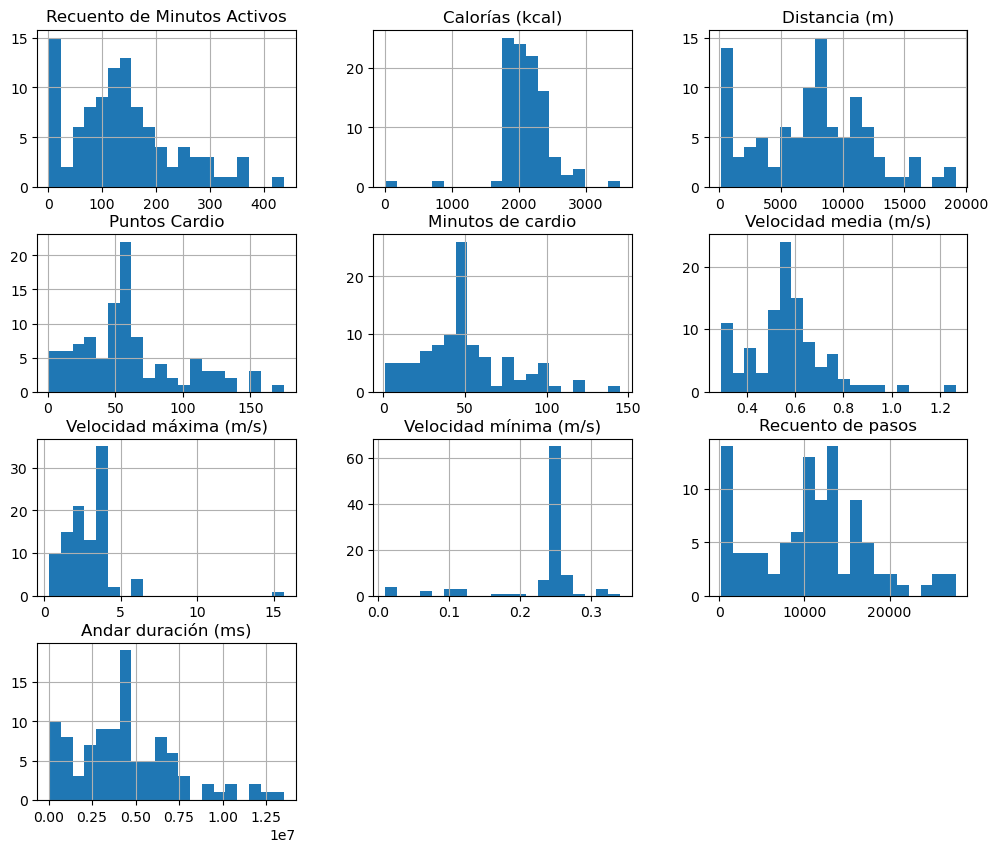

In [15]:
# Histogramas
df_cleaned.hist(figsize=(12, 10), bins=20)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


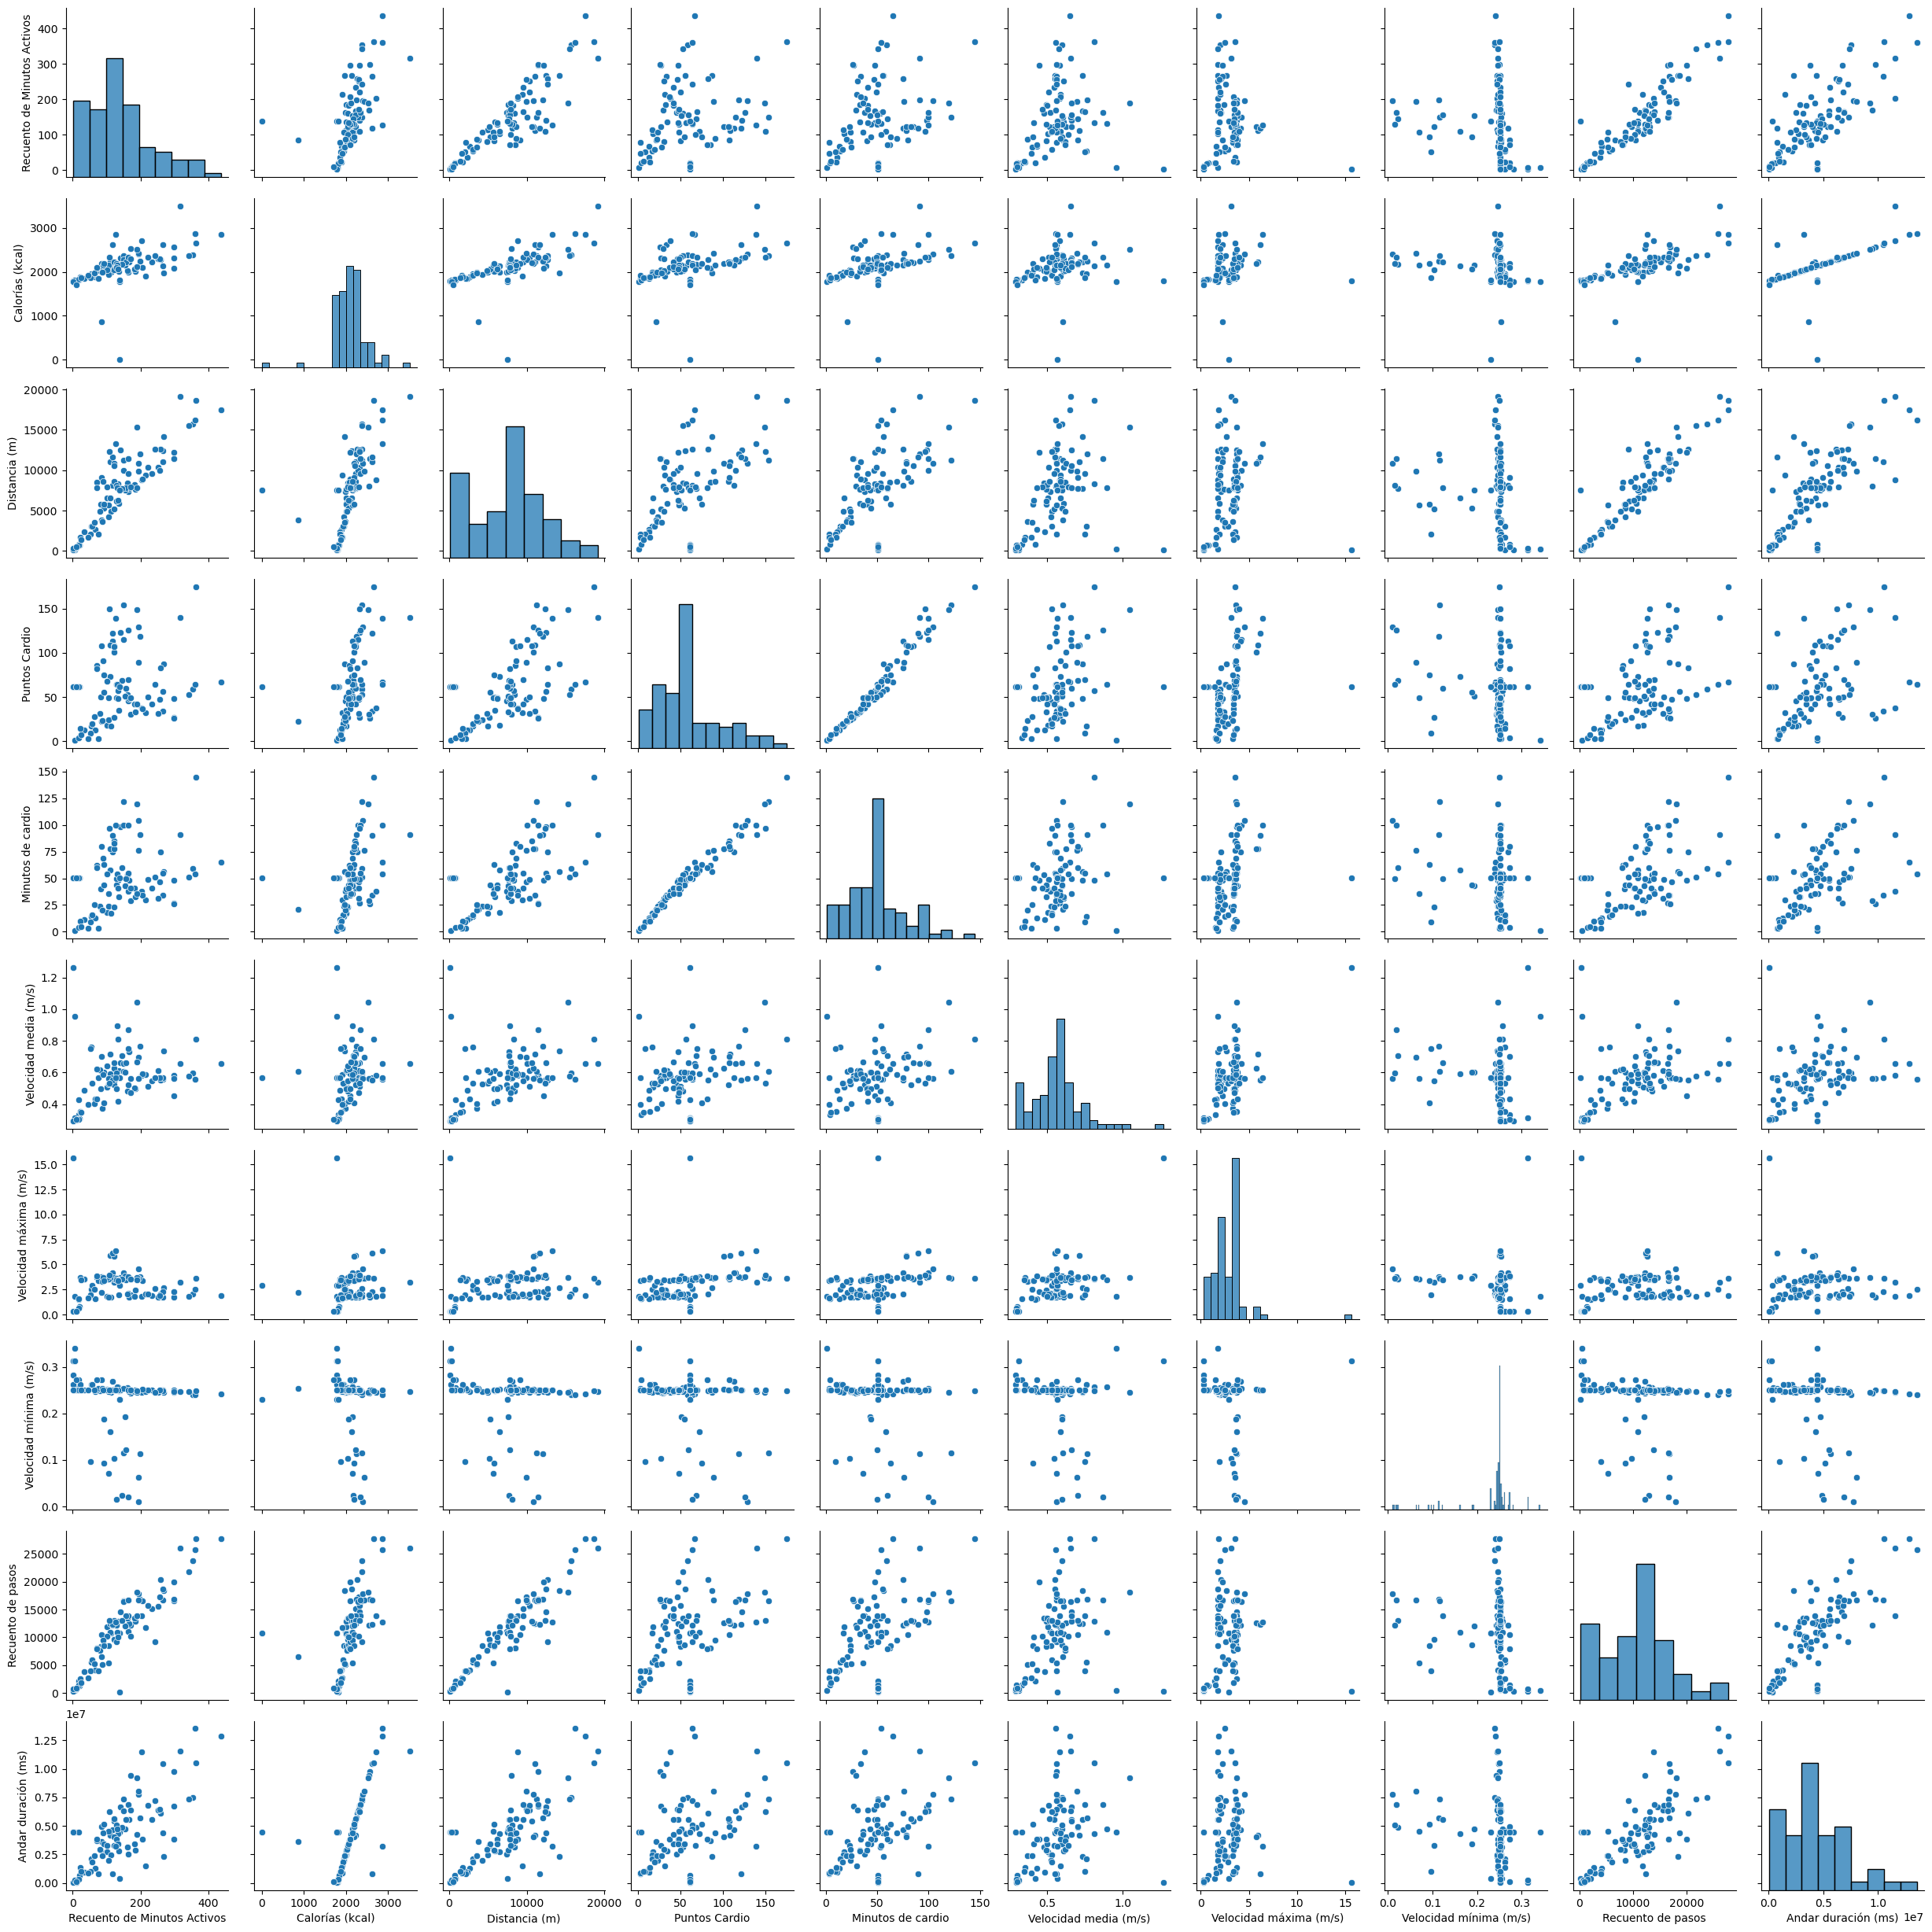

In [16]:
# Gráficos de dispersión (scatter plots)
sns.pairplot(df_cleaned)
plt.show()

3. **Correlación entre variables**

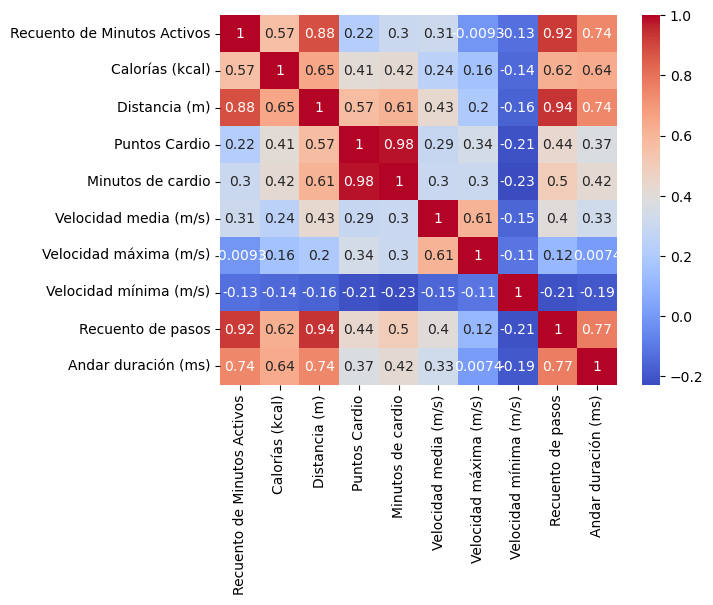

In [19]:
# Excluir la columna 'Fecha' para el cálculo de la correlación
correlation_matrix = df_cleaned.drop('Fecha', axis=1).corr()

# Mostrar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


4. **Tendencia temporales**

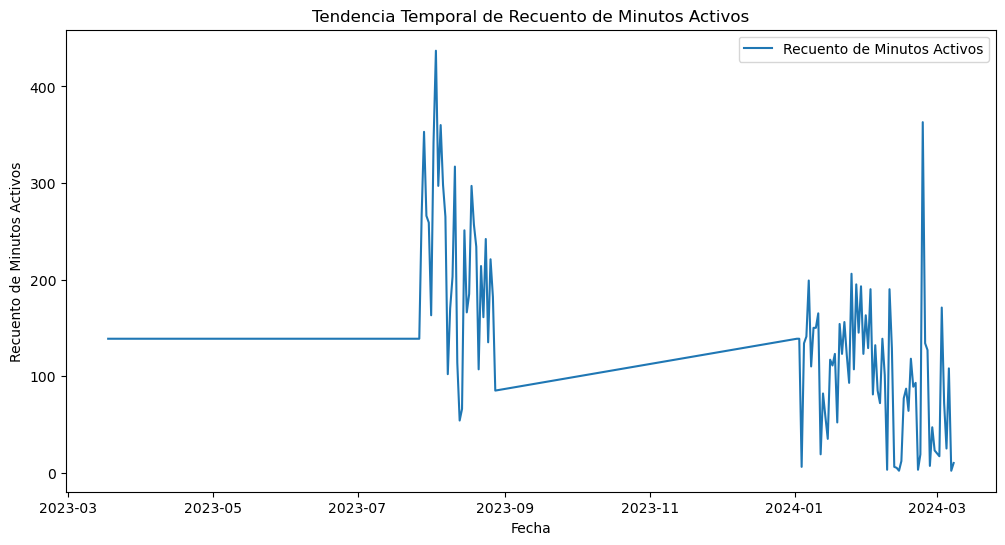

In [18]:
# Convertir la columna 'Fecha' a tipo datetime
df_cleaned['Fecha'] = pd.to_datetime(df_cleaned['Fecha'])

# Gráfico de línea para visualizar tendencias temporales
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Fecha'], df_cleaned['Recuento de Minutos Activos'], label='Recuento de Minutos Activos')
plt.xlabel('Fecha')
plt.ylabel('Recuento de Minutos Activos')
plt.title('Tendencia Temporal de Recuento de Minutos Activos')
plt.legend()
plt.show()

5. **Análisis por mes**

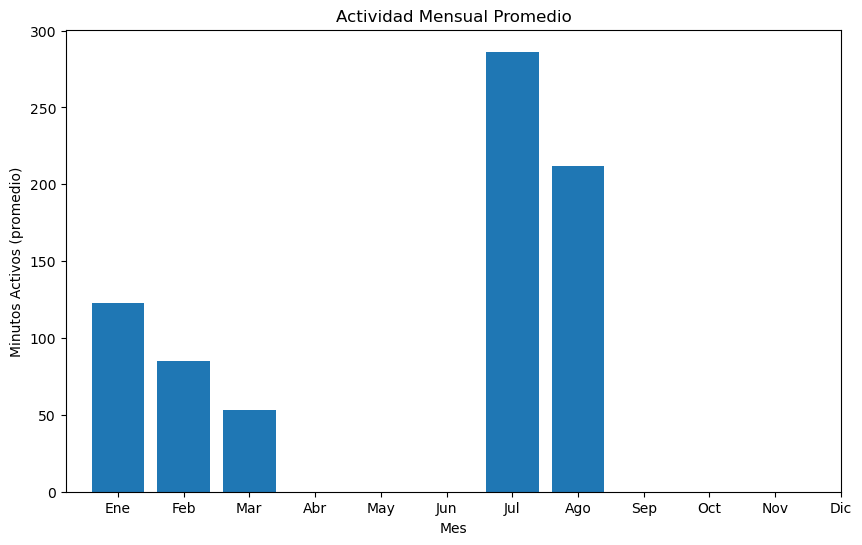

In [22]:
# Convertir la columna 'Fecha' a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear columnas adicionales para mes y año
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

# Calcular promedio de cada métrica para cada mes
promedio_por_mes = df.groupby(['Año', 'Mes']).mean().reset_index()
# Crear un gráfico de barras para la media de minutos activos por mes
plt.figure(figsize=(10, 6))
plt.bar(promedio_por_mes['Mes'], promedio_por_mes['Recuento de Minutos Activos'])
plt.xlabel('Mes')
plt.ylabel('Minutos Activos (promedio)')
plt.title('Actividad Mensual Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

6. **Actividad por días**

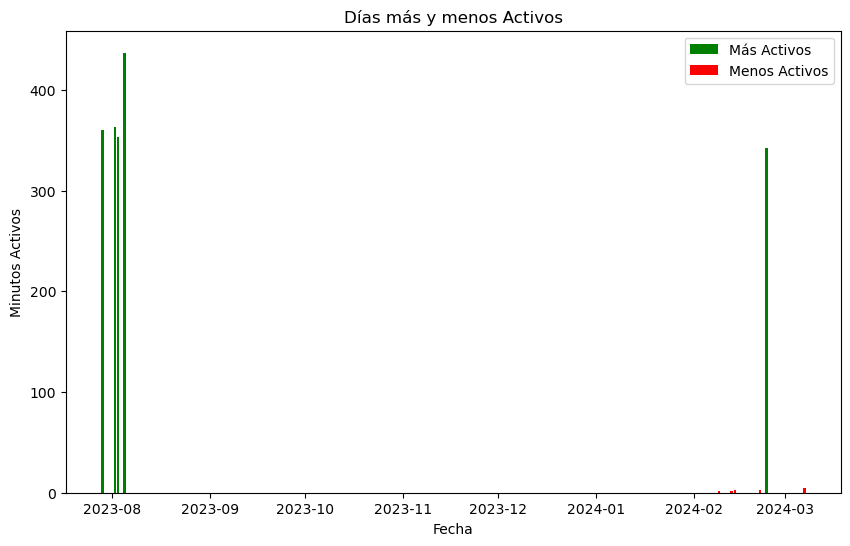

In [23]:
# Encontrar días más activos y menos activos
dias_activos = df.nlargest(5, 'Recuento de Minutos Activos')['Fecha']
dias_menos_activos = df.nsmallest(5, 'Recuento de Minutos Activos')['Fecha']
# Crear un gráfico de barras para los días más y menos activos
plt.figure(figsize=(10, 6))
plt.bar(dias_activos, df.loc[df['Fecha'].isin(dias_activos)]['Recuento de Minutos Activos'], color='green', label='Más Activos')
plt.bar(dias_menos_activos, df.loc[df['Fecha'].isin(dias_menos_activos)]['Recuento de Minutos Activos'], color='red', label='Menos Activos')
plt.xlabel('Fecha')
plt.ylabel('Minutos Activos')
plt.title('Días más y menos Activos')
plt.legend()
plt.show()

7. **Duración de actividades**

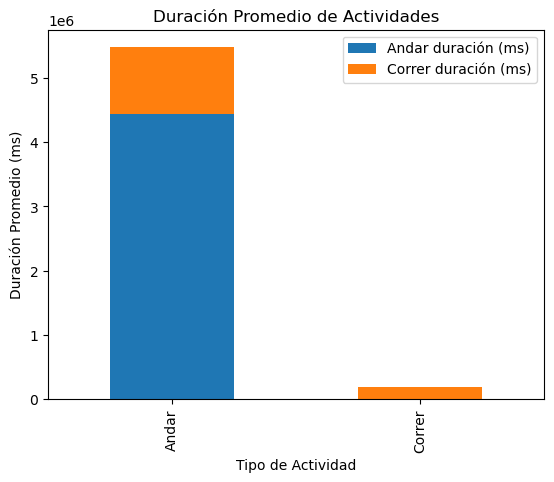

In [28]:
# Filtrar solo las filas donde la actividad es 'Andar' o 'Correr'
df_actividades = df[df['Tipo de Actividad'].isin(['Andar', 'Correr'])]

# Calcular la duración promedio de cada tipo de actividad
promedio_actividades = df_actividades.groupby('Tipo de Actividad')[['Andar duración (ms)', 'Correr duración (ms)']].mean()

# Visualizar los resultados
promedio_actividades.plot(kind='bar', stacked=True)
plt.title('Duración Promedio de Actividades')
plt.xlabel('Tipo de Actividad')
plt.ylabel('Duración Promedio (ms)')
plt.show()

8. **Velocidad en actividades**

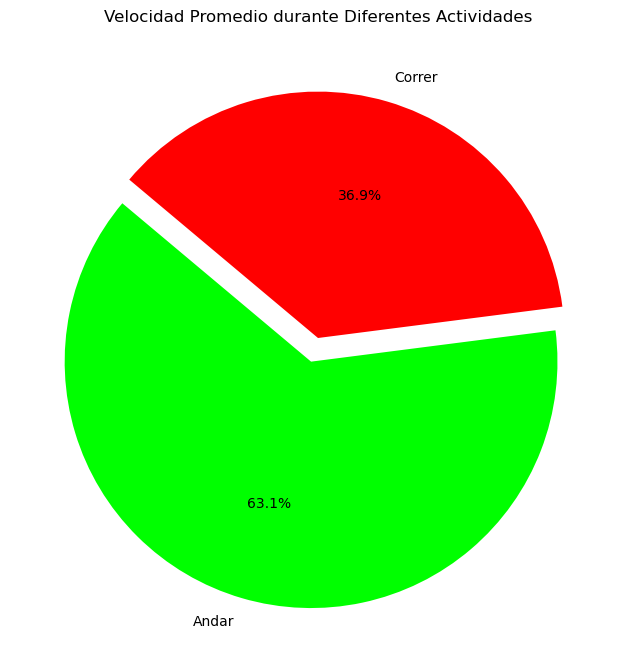

In [35]:
# Filtrar solo las filas donde la actividad no es 'None'
df_actividades = df[df['Tipo de Actividad'] != 'None']

# Calcular la velocidad promedio por actividad
velocidad_por_actividad = df_actividades.groupby('Tipo de Actividad')['Velocidad media (m/s)'].mean()

# Configurar colores personalizados (verde y rojo)
colores_personalizados = ['#00FF00', '#FF0000']

# Explorar la rebanada más grande (usando verde y rojo)
explode = [0.1 if actividad == velocidad_por_actividad.idxmax() else 0 for actividad in velocidad_por_actividad.index]

# Crear el gráfico de pastel con colores personalizados
plt.figure(figsize=(8, 8))
plt.pie(velocidad_por_actividad, labels=velocidad_por_actividad.index, autopct='%1.1f%%', startangle=140, colors=colores_personalizados, explode=explode)
plt.title('Velocidad Promedio durante Diferentes Actividades')
plt.show()


9. **Variaciones de tiempo**

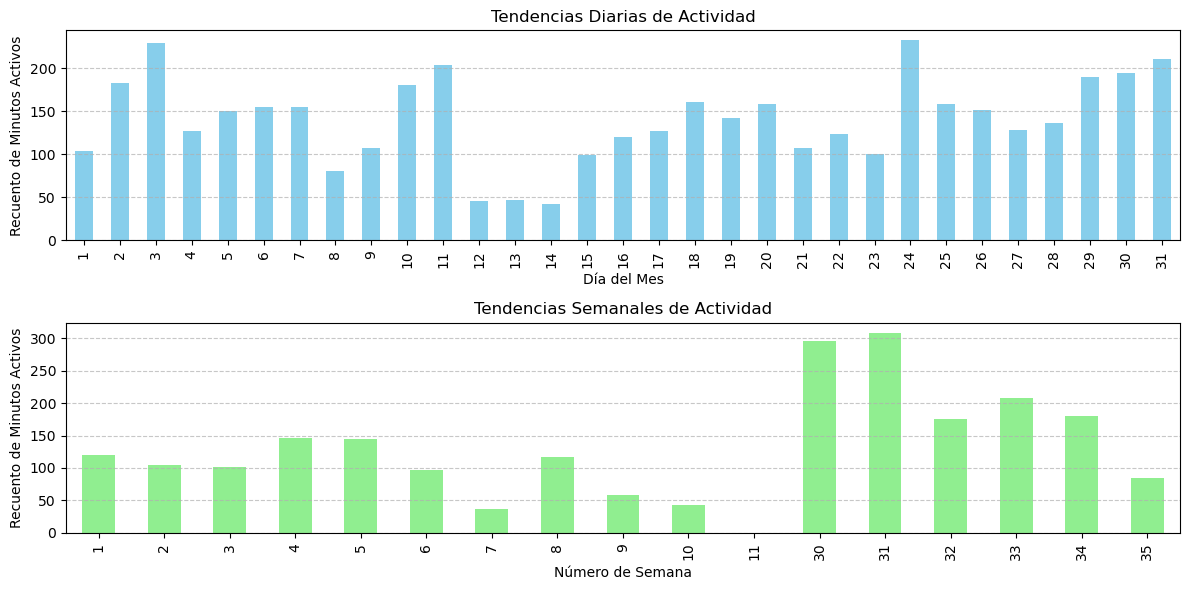

In [37]:
# Observar tendencias de actividad a lo largo del tiempo
tendencias_diarias = df.groupby(df['Fecha'].dt.day)['Recuento de Minutos Activos'].mean()
tendencias_semanales = df.groupby(df['Fecha'].dt.isocalendar().week)['Recuento de Minutos Activos'].mean()
# Configuración de gráficos
plt.figure(figsize=(12, 6))

# Gráfico de tendencias diarias
plt.subplot(2, 1, 1)
tendencias_diarias.plot(kind='bar', color='skyblue')
plt.title('Tendencias Diarias de Actividad')
plt.xlabel('Día del Mes')
plt.ylabel('Recuento de Minutos Activos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de tendencias semanales
plt.subplot(2, 1, 2)
tendencias_semanales.plot(kind='bar', color='lightgreen')
plt.title('Tendencias Semanales de Actividad')
plt.xlabel('Número de Semana')
plt.ylabel('Recuento de Minutos Activos')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustes de diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()

10. **Distribución de actividades**

In [42]:
df_actividades['startTime'] = pd.to_datetime(df_actividades['startTime'])
df_actividades['endTime'] = pd.to_datetime(df_actividades['endTime'])


In [43]:
df_actividades['duracion_minutos'] = (df_actividades['endTime'] - df_actividades['startTime']).dt.total_seconds() / 60

In [44]:
# Ejemplo: Extraer el número total de pasos de cada actividad
df_actividades['total_pasos'] = df_actividades['aggregate'].apply(lambda x: next((item['intValue'] for item in x if item['metricName'] == 'com.google.step_count.delta'), None))

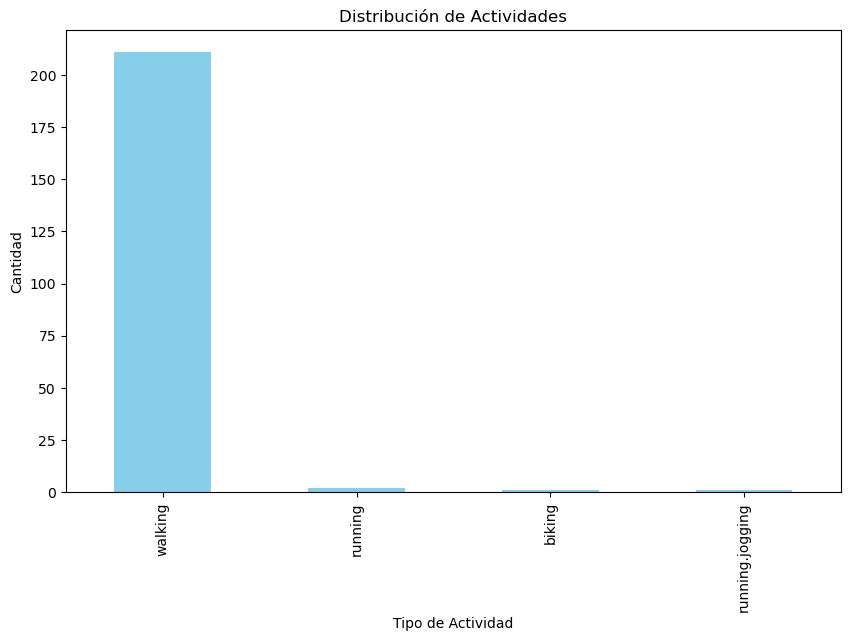

In [53]:
plt.figure(figsize=(10, 6))
df_actividades['fitnessActivity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Actividades')
plt.xlabel('Tipo de Actividad')
plt.ylabel('Cantidad')
plt.show()

11. **Duración de actividades**

In [55]:
# Duración promedio por actividad
duracion_promedio = df_actividades.groupby('fitnessActivity')['duracion_minutos'].mean()
duracion_promedio

fitnessActivity
biking             10.000000
running            90.703542
running.jogging    53.517633
walking            33.490600
Name: duracion_minutos, dtype: float64

12. **Análisis temporal**

Tendencias diarias startTime
1     24.003794
2     33.137279
3     35.768850
4     25.780563
5     54.180202
6     50.445012
7     49.568246
8     40.147790
9     62.426067
10    70.247626
11    25.609492
13    22.020183
14    26.938683
15    33.905433
16    34.126306
17    54.926100
18    51.515178
19    29.891343
20    30.886012
21    29.395011
22     9.923167
23    50.520992
24    31.405205
25    18.595998
26    30.725181
27    36.715669
28    18.635745
29    18.940436
30    50.230761
31    30.538142
Name: duracion_minutos, dtype: float64


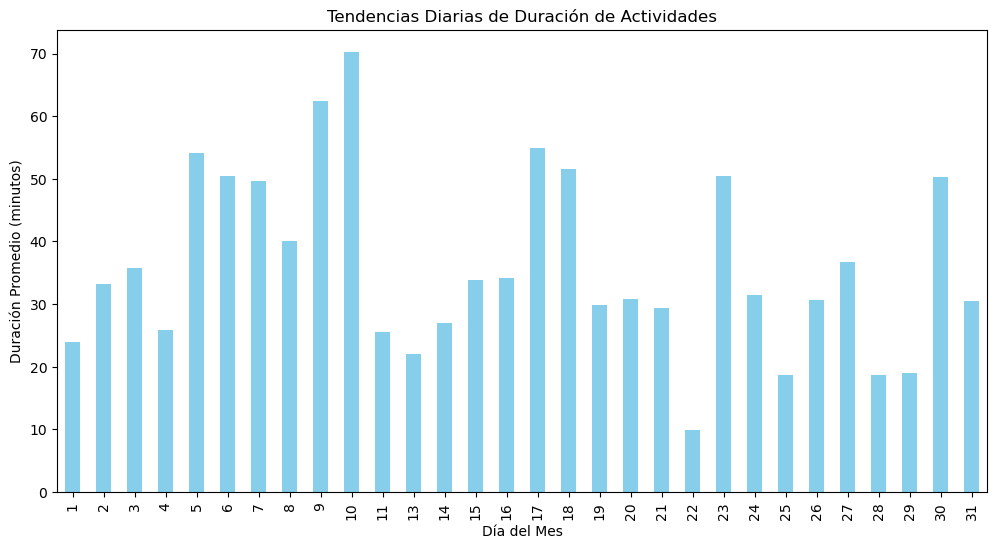

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Tendencias semanales week
1     75.419017
2     34.286811
3     35.714206
4     23.145847
5     29.107877
6     44.180502
7     71.091175
8     45.091359
9     37.583781
10    80.318617
30    21.200602
31    34.213125
32    44.337569
33    24.119646
34    24.607542
35     6.197550
Name: duracion_minutos, dtype: float64


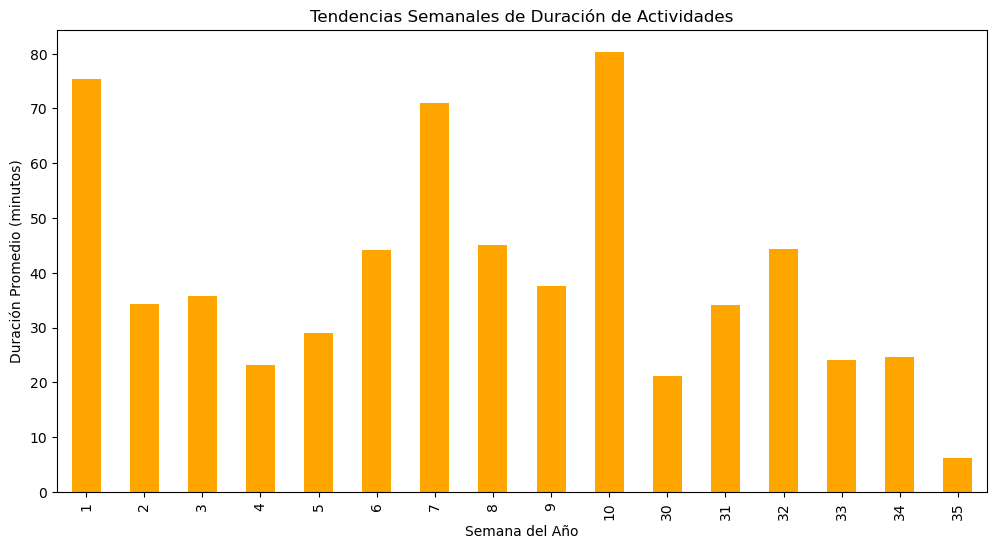

In [75]:
# Tendencias diarias y semanales
tendencias_diarias = df_actividades.groupby(df_actividades['startTime'].dt.day)['duracion_minutos'].mean()
tendencias_semanales = df_actividades.groupby(df_actividades['startTime'].dt.isocalendar().week)['duracion_minutos'].mean()

print('Tendencias diarias',tendencias_diarias)
# Gráfico de tendencias diarias
plt.figure(figsize=(12, 6))
tendencias_diarias.plot(kind='bar', color='skyblue')
plt.title('Tendencias Diarias de Duración de Actividades')
plt.xlabel('Día del Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.show()
print('-'*125)
print('-'*125)
print('Tendencias semanales',tendencias_semanales)
# Gráfico de tendencias semanales
plt.figure(figsize=(12, 6))
tendencias_semanales.plot(kind='bar', color='orange')
plt.title('Tendencias Semanales de Duración de Actividades')
plt.xlabel('Semana del Año')
plt.ylabel('Duración Promedio (minutos)')
plt.show()

13. **Relación duración/pasos**

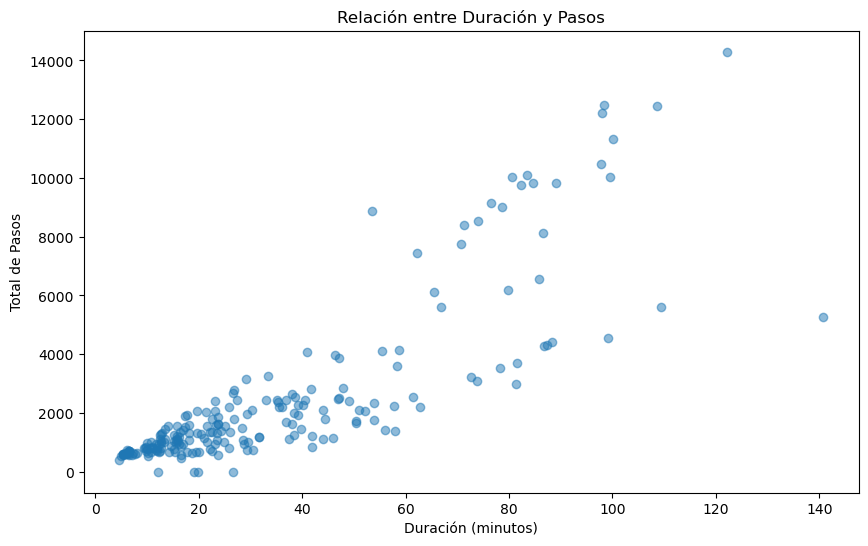

In [58]:
# Relación entre duración y pasos
plt.figure(figsize=(10, 6))
plt.scatter(df_actividades['duracion_minutos'], df_actividades['total_pasos'], alpha=0.5)
plt.title('Relación entre Duración y Pasos')
plt.xlabel('Duración (minutos)')
plt.ylabel('Total de Pasos')
plt.show()

14. **Métricas agregadas**

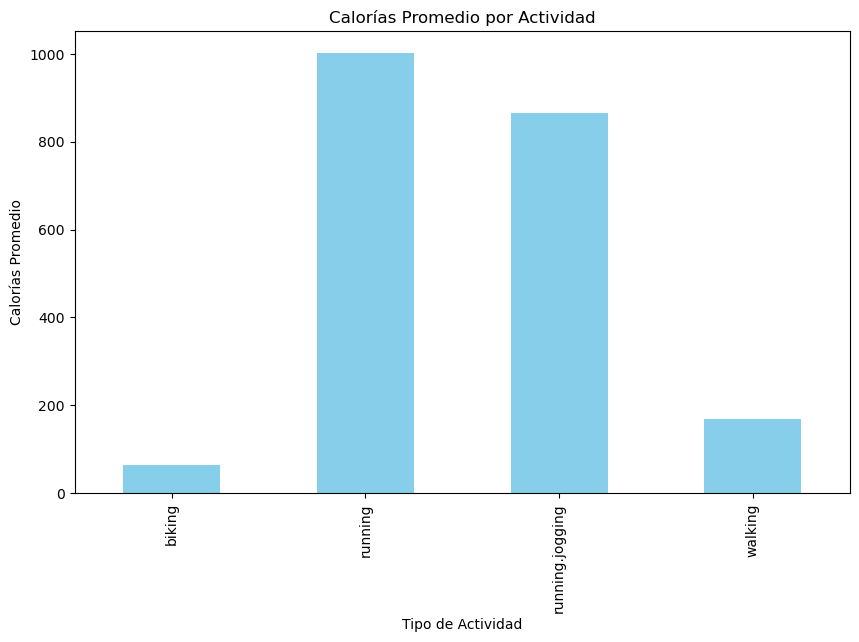

In [79]:
# Convertir la duración de segundos a minutos
df_actividades['duracion_minutos'] = df_actividades['duration'].apply(lambda x: float(x[:-1]) / 60)

# Calorías promedio por actividad
def calcular_calorias_promedio(x):
    calorias = [item['floatValue'] for sublist in x for item in sublist if item['metricName'] == 'com.google.calories.expended']
    return np.mean(calorias) if calorias else np.nan

calorias_por_actividad = df_actividades.groupby('fitnessActivity')['aggregate'].apply(calcular_calorias_promedio)
calorias_por_actividad = calorias_por_actividad.dropna()  # Eliminar NaN si es necesario

# Plot de barras para calorías promedio por actividad
plt.figure(figsize=(10, 6))
calorias_por_actividad.plot(kind='bar', color='skyblue')
plt.title('Calorías Promedio por Actividad')
plt.xlabel('Tipo de Actividad')
plt.ylabel('Calorías Promedio')
plt.show()


15. **Correlación entre variables**

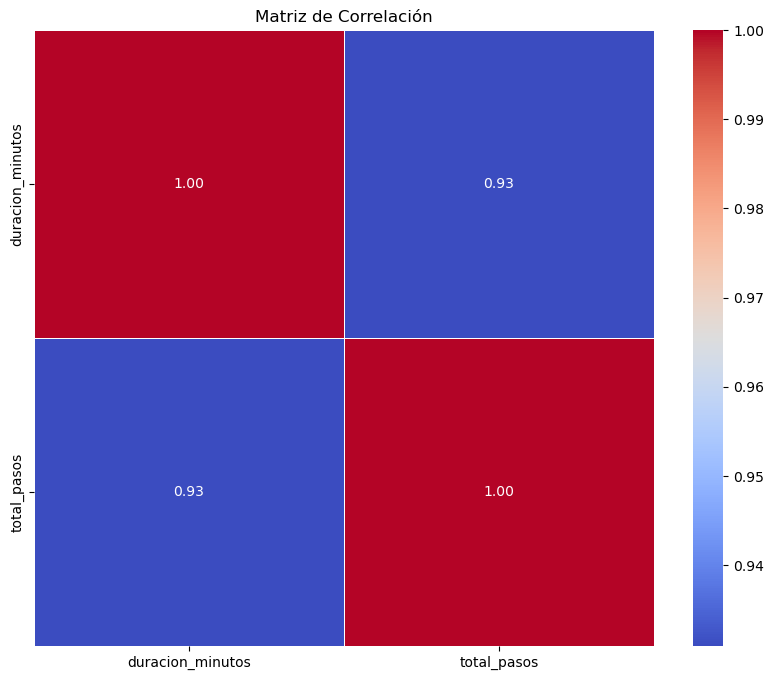

In [83]:
# Crear una copia del DataFrame original
df_numeric = df_actividades.copy()

# Convertir 'duracion_minutos' a formato numérico
df_numeric['duracion_minutos'] = pd.to_numeric(df_numeric['duracion_minutos'], errors='coerce')

# Eliminar las columnas no numéricas y temporales
df_numeric = df_numeric.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

16. **Tendencias de actividad diaria y semanal**

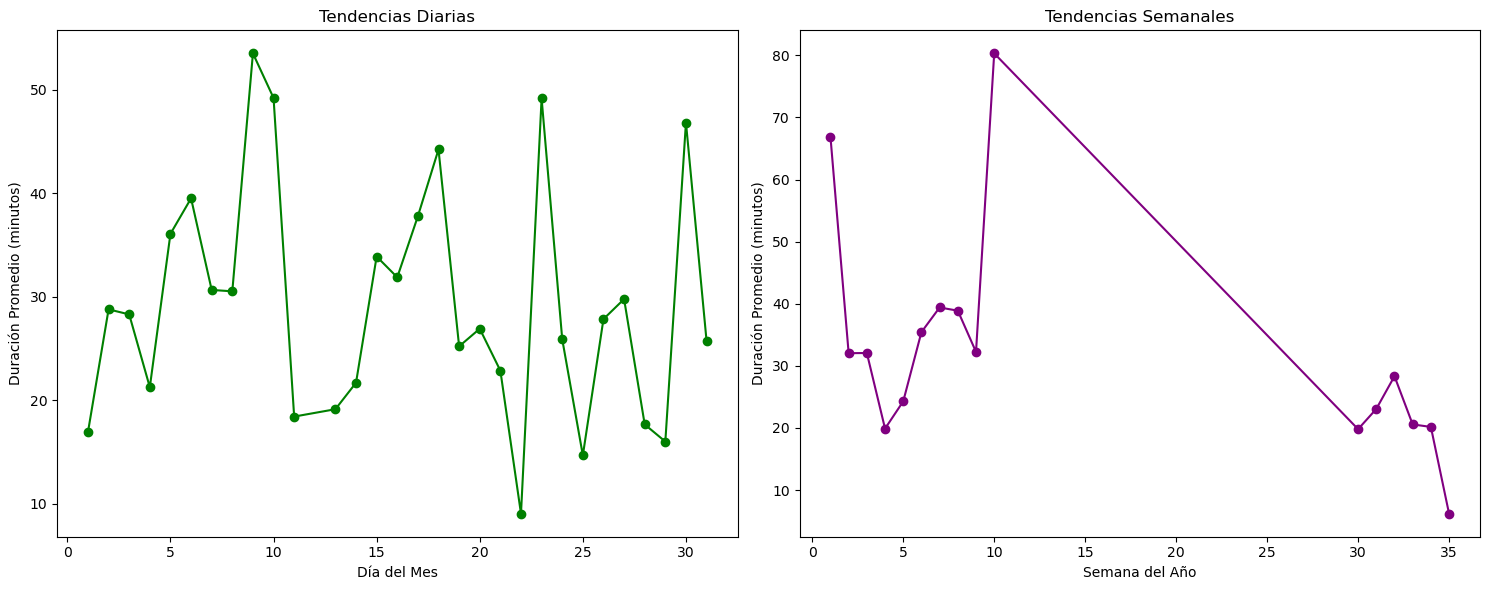

In [86]:
# Asegurémonos de que 'startTime' sea del tipo datetime
df_actividades['startTime'] = pd.to_datetime(df_actividades['startTime'])

# Tendencias diarias y semanales
tendencias_diarias = df_actividades.groupby(df_actividades['startTime'].dt.day)['duracion_minutos'].mean()
tendencias_semanales = df_actividades.groupby(df_actividades['startTime'].dt.isocalendar().week)['duracion_minutos'].mean()

# Visualizar tendencias diarias y semanales
plt.figure(figsize=(15, 6))

# Tendencias diarias
plt.subplot(1, 2, 1)
tendencias_diarias.plot(kind='line', marker='o', color='green')
plt.title('Tendencias Diarias')
plt.xlabel('Día del Mes')
plt.ylabel('Duración Promedio (minutos)')

# Tendencias semanales
plt.subplot(1, 2, 2)
tendencias_semanales.plot(kind='line', marker='o', color='purple')
plt.title('Tendencias Semanales')
plt.xlabel('Semana del Año')
plt.ylabel('Duración Promedio (minutos)')

plt.tight_layout()
plt.show()


17. **Calorías promedio de actividad**

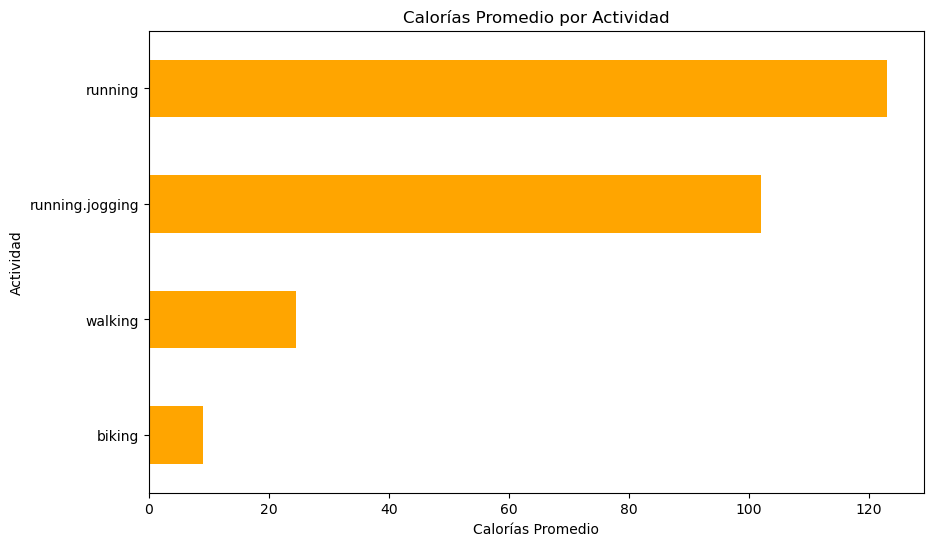

In [87]:
# Asegurémonos de que 'aggregate' sea del tipo adecuado
df_actividades['aggregate'] = df_actividades['aggregate'].apply(lambda x: x[0]['floatValue'] if x else np.nan)

# Calorías promedio por actividad
calorias_por_actividad = df_actividades.groupby('fitnessActivity')['aggregate'].mean()

# Visualizar calorías por actividad
plt.figure(figsize=(10, 6))
calorias_por_actividad.sort_values().plot(kind='barh', color='orange')
plt.title('Calorías Promedio por Actividad')
plt.xlabel('Calorías Promedio')
plt.ylabel('Actividad')

plt.show()

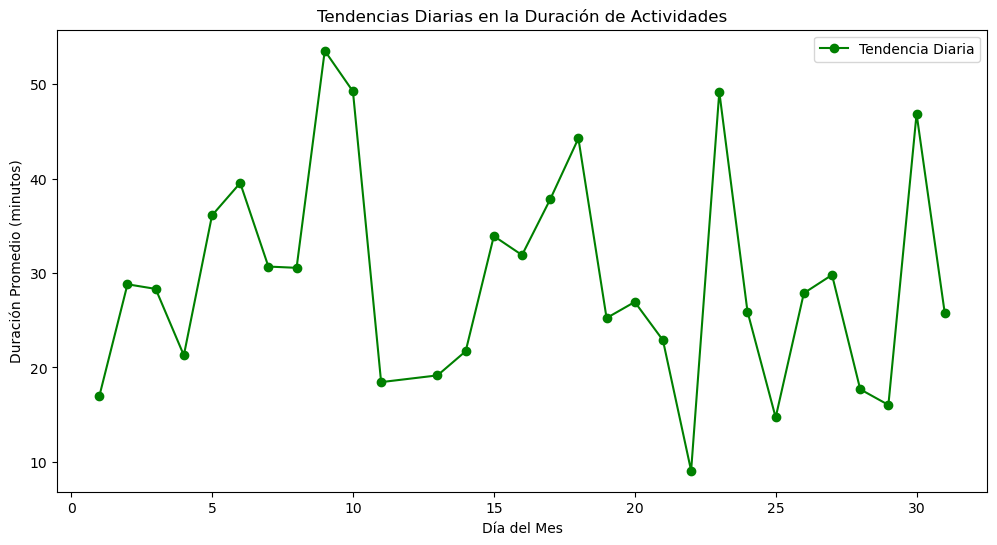

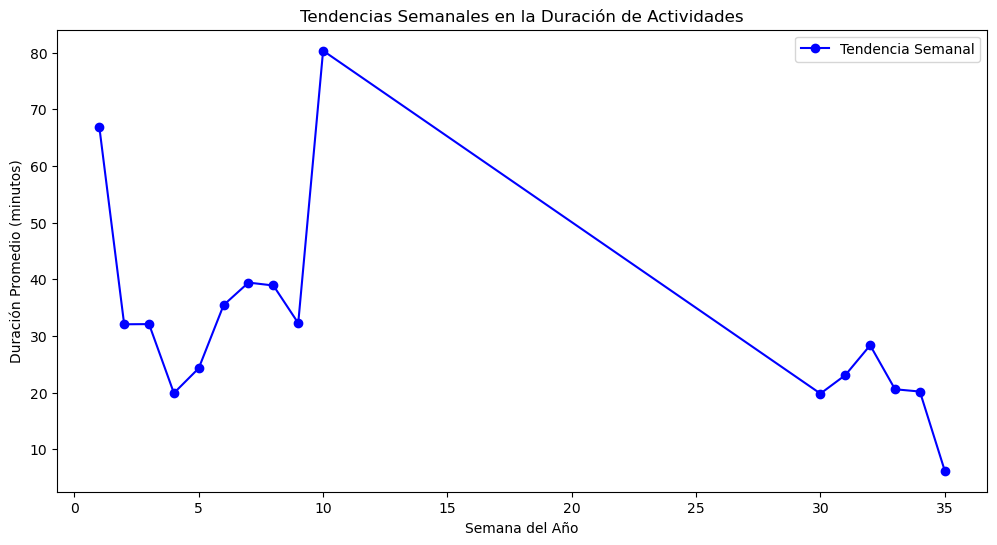

In [89]:
# Asegurémonos de que 'duracion_minutos' sea del tipo adecuado
df_actividades['duracion_minutos'] = pd.to_numeric(df_actividades['duracion_minutos'], errors='coerce')

# Tendencias diarias y semanales
tendencias_diarias = df_actividades.groupby(df_actividades['startTime'].dt.day)['duracion_minutos'].mean()
tendencias_semanales = df_actividades.groupby(df_actividades['startTime'].dt.isocalendar().week)['duracion_minutos'].mean()

# Visualizar tendencias diarias
plt.figure(figsize=(12, 6))
tendencias_diarias.plot(marker='o', linestyle='-', color='green', label='Tendencia Diaria')
plt.title('Tendencias Diarias en la Duración de Actividades')
plt.xlabel('Día del Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.legend()
plt.show()

# Visualizar tendencias semanales
plt.figure(figsize=(12, 6))
tendencias_semanales.plot(marker='o', linestyle='-', color='blue', label='Tendencia Semanal')
plt.title('Tendencias Semanales en la Duración de Actividades')
plt.xlabel('Semana del Año')
plt.ylabel('Duración Promedio (minutos)')
plt.legend()
plt.show()

# Modelo predictivo

Vamos a crear un modelo predictivo, para ello vamos a fusionar los dos DataFrames, para ello los vamos a unir por fechas de actividad

In [90]:
# Visualizar las fechas en ambos DataFrames
print("Fechas en df_actividades:")
print(df_actividades['startTime'].head())

print("\nFechas en df_cleaned:")
print(df_cleaned['Fecha'].head())


Fechas en df_actividades:
0   2023-07-28 18:36:27.084000+00:00
1   2023-07-28 22:05:43.594000+00:00
2   2023-07-29 08:29:12.629000+00:00
3   2023-07-29 10:07:18.046000+00:00
4   2023-07-29 11:15:08.824000+00:00
Name: startTime, dtype: datetime64[ns, UTC]

Fechas en df_cleaned:
0   2023-03-18
1   2023-07-27
2   2023-07-28
3   2023-07-29
4   2023-07-30
Name: Fecha, dtype: datetime64[ns]


In [91]:
# Paso 1: Convertir fechas de df_cleaned al mismo formato que df_actividades
df_cleaned['Fecha'] = pd.to_datetime(df_cleaned['Fecha'])

# Verificar que las fechas ahora estén en el mismo formato
print("Fechas en df_cleaned después de la conversión:")
print(df_cleaned['Fecha'].head())


Fechas en df_cleaned después de la conversión:
0   2023-03-18
1   2023-07-27
2   2023-07-28
3   2023-07-29
4   2023-07-30
Name: Fecha, dtype: datetime64[ns]


In [94]:
# Fechas únicas en df_actividades
unique_dates_actividades = df_actividades['startTime'].dt.date.unique()
print("Fechas únicas en df_actividades:")
print(unique_dates_actividades)

# Fechas únicas en df_cleaned después de la conversión de la zona horaria
unique_dates_cleaned = df_cleaned['Fecha'].dt.date.unique()
print("\nFechas únicas en df_cleaned después de la conversión:")
print(unique_dates_cleaned)


Fechas únicas en df_actividades:
[datetime.date(2023, 7, 28) datetime.date(2023, 7, 29)
 datetime.date(2023, 7, 30) datetime.date(2023, 7, 31)
 datetime.date(2023, 8, 1) datetime.date(2023, 8, 2)
 datetime.date(2023, 8, 3) datetime.date(2023, 8, 4)
 datetime.date(2023, 8, 5) datetime.date(2023, 8, 6)
 datetime.date(2023, 8, 7) datetime.date(2023, 8, 8)
 datetime.date(2023, 8, 9) datetime.date(2023, 8, 10)
 datetime.date(2023, 8, 11) datetime.date(2023, 8, 13)
 datetime.date(2023, 8, 14) datetime.date(2023, 8, 15)
 datetime.date(2023, 8, 16) datetime.date(2023, 8, 17)
 datetime.date(2023, 8, 18) datetime.date(2023, 8, 19)
 datetime.date(2023, 8, 20) datetime.date(2023, 8, 21)
 datetime.date(2023, 8, 22) datetime.date(2023, 8, 23)
 datetime.date(2023, 8, 24) datetime.date(2023, 8, 25)
 datetime.date(2023, 8, 26) datetime.date(2023, 8, 27)
 datetime.date(2023, 8, 28) datetime.date(2024, 1, 5)
 datetime.date(2024, 1, 6) datetime.date(2024, 1, 7)
 datetime.date(2024, 1, 8) datetime.date(202

In [95]:
# Paso 2: Fusionar los dos conjuntos de datos en función de las fechas comunes
df_combined = pd.merge(df_cleaned, df_actividades, left_on='Fecha', right_on='startTime', how='inner')

# Verificar el DataFrame combinado
print("DataFrame combinado:")
print(df_combined.head())

DataFrame combinado:
Empty DataFrame
Columns: [Fecha, Recuento de Minutos Activos, Calorías (kcal), Distancia (m), Puntos Cardio, Minutos de cardio, Velocidad media (m/s), Velocidad máxima (m/s), Velocidad mínima (m/s), Recuento de pasos, Andar duración (ms), fitnessActivity, startTime, endTime, duration, segment, aggregate, duracion_minutos, total_pasos]
Index: []


In [96]:
# Imprimir fechas únicas en ambos DataFrames antes de la fusión
print("Fechas únicas en df_actividades:")
print(df_actividades['startTime'].dt.date.unique())

print("\nFechas únicas en df_cleaned después de la conversión:")
print(df_cleaned['Fecha'].dt.date.unique())


Fechas únicas en df_actividades:
[datetime.date(2023, 7, 28) datetime.date(2023, 7, 29)
 datetime.date(2023, 7, 30) datetime.date(2023, 7, 31)
 datetime.date(2023, 8, 1) datetime.date(2023, 8, 2)
 datetime.date(2023, 8, 3) datetime.date(2023, 8, 4)
 datetime.date(2023, 8, 5) datetime.date(2023, 8, 6)
 datetime.date(2023, 8, 7) datetime.date(2023, 8, 8)
 datetime.date(2023, 8, 9) datetime.date(2023, 8, 10)
 datetime.date(2023, 8, 11) datetime.date(2023, 8, 13)
 datetime.date(2023, 8, 14) datetime.date(2023, 8, 15)
 datetime.date(2023, 8, 16) datetime.date(2023, 8, 17)
 datetime.date(2023, 8, 18) datetime.date(2023, 8, 19)
 datetime.date(2023, 8, 20) datetime.date(2023, 8, 21)
 datetime.date(2023, 8, 22) datetime.date(2023, 8, 23)
 datetime.date(2023, 8, 24) datetime.date(2023, 8, 25)
 datetime.date(2023, 8, 26) datetime.date(2023, 8, 27)
 datetime.date(2023, 8, 28) datetime.date(2024, 1, 5)
 datetime.date(2024, 1, 6) datetime.date(2024, 1, 7)
 datetime.date(2024, 1, 8) datetime.date(202

In [113]:
# Paso 3: Fusionar los dos conjuntos de datos en función de las fechas con una ventana de tiempo
df_combined = pd.merge_asof(df_cleaned, df_actividades, left_on='Fecha', right_on='startTime', direction='backward', tolerance=pd.Timedelta('1 day'))

# Verificar el DataFrame combinado
print("DataFrame combinado:")
print(df_combined)


DataFrame combinado:
     level_0_x  index_x                     Fecha  \
0            0        0 2023-03-18 00:00:00+00:00   
1            1        1 2023-07-27 00:00:00+00:00   
2            2        2 2023-07-28 00:00:00+00:00   
3            3        3 2023-07-29 00:00:00+00:00   
4            4        4 2023-07-30 00:00:00+00:00   
..         ...      ...                       ...   
96          96       96 2024-03-04 00:00:00+00:00   
97          97       97 2024-03-05 00:00:00+00:00   
98          98       98 2024-03-06 00:00:00+00:00   
99          99       99 2024-03-07 00:00:00+00:00   
100        100      100 2024-03-08 00:00:00+00:00   

     Recuento de Minutos Activos  Calorías (kcal)  Distancia (m)  \
0                     138.697917         0.034306    7502.410770   
1                     138.697917      1784.500030    7502.410770   
2                     267.000000      1967.615444   14153.293786   
3                     353.000000      2383.198122   15731.670083   
4 

In [174]:
# Ajusta la tolerancia según tus necesidades. En este ejemplo, se ha establecido en 24 horas (1 día).
tolerancia = pd.Timedelta(days=1)

# Realiza la fusión basándote en la columna 'startTime' de df_actividades y 'Fecha' de df_cleaned
df_clasificacion = pd.merge_asof(df_actividades, df_cleaned, left_on='startTime', right_on='Fecha', tolerance=tolerancia)

# Muestra el DataFrame combinado
print(df_clasificacion)


     level_0_x  index_x fitnessActivity                        startTime  \
0            0        0         walking 2023-07-28 18:36:27.084000+00:00   
1            1        1         walking 2023-07-28 22:05:43.594000+00:00   
2            2        2         walking 2023-07-29 08:29:12.629000+00:00   
3            3        3         walking 2023-07-29 10:07:18.046000+00:00   
4            4        4         walking 2023-07-29 11:15:08.824000+00:00   
..         ...      ...             ...                              ...   
210        210      210         walking 2024-03-03 17:43:26.271000+00:00   
211        211      211         walking 2024-03-03 18:12:41.067000+00:00   
212        212      212         walking 2024-03-03 19:18:10.968000+00:00   
213        213      213         walking 2024-03-04 17:13:46.188000+00:00   
214        214      214         walking 2024-03-06 17:15:38.919000+00:00   

                             endTime   duration  \
0   2023-07-28 19:00:09.551000+00:00

1. **Definimos variable objetivo**

In [175]:
# Por ejemplo, aquí estoy seleccionando 'fitnessActivity' como objetivo y algunas otras como características
X = df_clasificacion[['duration', 'duracion_minutos', 'total_pasos', 'Recuento de Minutos Activos', 'Calorías (kcal)', 'Distancia (m)', 'Puntos Cardio', 'Minutos de cardio', 'Velocidad media (m/s)', 'Velocidad máxima (m/s)', 'Velocidad mínima (m/s)', 'Recuento de pasos', 'Andar duración (ms)']]
y = df_clasificacion['fitnessActivity']

2. **Dividimos datos para entrenamiento y test**

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. **Definimos transformadores para variables categóricas y numéricas**

In [177]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

4. **Combinamos los transformadores en uno solo**

In [178]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', categoric_transformer, X.select_dtypes(include=['object']).columns)
    ]
)

5. **Aplicamos el procesamiento al conjuto de prueba y test**

In [179]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

6. **Aplicamos el modelo de clasificación**

In [180]:
# Crear un clasificador Random Forest
clf = RandomForestClassifier(random_state=42)

# Entrenar el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo de clasificación
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 0.9767441860465116


7. **Aplicamos el modelo de regresión**

In [181]:
import pandas as pd

def transformar_listas_a_cadenas(valor):
    if isinstance(valor, list):
        return ','.join(map(str, valor))
    return valor

# Aplicar la transformación a la columna 'fitnessActivity'
df_combinado['fitnessActivity'] = df_combinado['fitnessActivity'].apply(transformar_listas_a_cadenas)

# Verificar el tipo de datos después de la transformación
print(df_combinado['fitnessActivity'].dtype)


object


In [182]:
# Identificar columnas que contienen listas
columns_with_lists = df_combinado.columns[df_combinado.applymap(type).eq(list).any()]

# Convertir listas a cadenas en las columnas identificadas
df_combinado[columns_with_lists] = df_combinado[columns_with_lists].applymap(lambda x: str(x))


# Separar las características y la variable objetivo
X_regresion = df_combinado.drop('Calorías (kcal)', axis=1)
y_regresion = df_combinado['Calorías (kcal)']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_regresion, y_regresion, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numericas = X_regresion.select_dtypes(include=['int64', 'float64']).columns
categoricas = X_regresion.select_dtypes(include=['object']).columns

# Crear transformadores para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Crear preprocesador columnar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numericas),
        ('cat', categoric_transformer, categoricas)
    ]
)

# Aplicar preprocesamiento a las características
X_regresion_transformed = preprocessor.fit_transform(X_regresion)

# Definir y entrenar el modelo de regresión
regression_model = LinearRegression()
regression_model.fit(X_regresion_transformed, y_regresion)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_model.predict(preprocessor.transform(X_test))

# Evaluar el rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.002318395396932194


# Conclusiones de los modelos predictivos

**Modelo de clasificación**

1. **Exactitud del modelo:**
    * Nuestro modelo de clasificación RandomForest logró una exactitud del 97.67%. En términos simples, esto significa que en aproximadamente el 98% de los casos, el modelo predijo correctamente la actividad física realizada.


2. **Predicciones Confiables:**
    * Con una exactitud tan alta, podemos tener confianza en las predicciones del modelo. Si tienes datos sobre la duración de la actividad, los pasos dados, las calorías quemadas, etc., el modelo puede predecir con precisión el tipo de actividad física realizada.

3. **Importancia de las Características:**
    * Al analizar la importancia de las características, identificamos qué aspectos de los datos son más influyentes en las predicciones. Esto podría incluir la duración de la actividad, la velocidad media, o el número de pasos.

4. **Mejoras Potenciales:**
    Aunque el modelo es muy preciso, siempre hay margen para mejoras. Podríamos explorar ajustes adicionales en los parámetros del modelo o considerar otras métricas de evaluación para asegurarnos de que el modelo sea robusto en diferentes situaciones.

5. **Aplicaciones Prácticas:**
    Este modelo puede tener aplicaciones prácticas en la monitorización de actividades físicas. Puede ayudar a automatizar el seguimiento de las actividades diarias, proporcionando información útil para el bienestar y la salud.

6. **Facilidad de Uso:**
    La simplicidad del modelo RandomForest lo hace fácil de entender y utilizar. Es una herramienta accesible para personas no técnicas que deseen aprovechar la tecnología para realizar un seguimiento eficaz de sus actividades físicas.

**Uso del modelo de clasificación**

Para utilizar el modelo de clasificación RandomForest para realizar predicciones sobre tus actividades futuras,  tendremos que pasarle los datos de años anteriores.

1. **Preparación de Datos:**
    * Asegúrate de tener los datos necesarios para la predicción. Estos deben incluir las características relevantes, como la duración de la actividad, los pasos dados, las calorías quemadas, etc. Asegúrate también de que los datos estén en el mismo formato que se utilizó para entrenar el modelo.

2. **Creación de un Nuevo Conjunto de Datos:**
    * Crea un nuevo conjunto de datos con la información sobre tus actividades planificadas para el próximo año. Este conjunto de datos debe tener las mismas características que se utilizaron para entrenar el modelo.

3. **Preprocesamiento de Datos:**
    Realiza cualquier preprocesamiento necesario en tus nuevos datos. Esto puede incluir la conversión de formatos, la manipulación de características y cualquier otro paso que sea consistente con el preprocesamiento que realizaste en los datos de entrenamiento.

4. **Realización de Predicciones:**
    * Utiliza el método predict de tu modelo de clasificación para realizar predicciones sobre las nuevas actividades planificadas. Pasa tus datos de entrada al modelo y obtén las etiquetas predichas.

In [ ]:
#Supongamos que 'X_nuevos_datos' es tu nuevo conjunto de datos para el próximo año

y_pred_nuevos_datos = clf.predict(X_nuevos_datos)

5. **Interpretación de Resultados:**
    * Examina las predicciones obtenidas. Cada predicción te dirá el tipo de actividad física que el modelo estima que realizarás según los datos proporcionados.

6. **Monitoreo Continuo:**
    * A medida que avanzas en el año, puedes seguir utilizando el modelo para realizar predicciones actualizadas basadas en tus actividades planificadas más recientes.

**Modelo de regresión**

En el modelo de regresión cabe destacar el bajo MAE obtenido (0.0023), lo que sugiere que el modelo tiene un buen rendimiento en la predicción de las calorías quemadas.

Para el uso del modelo deberemos hacer lo siguiente:

In [ ]:
# Supongamos que 'X_nuevos_datos_regresion' es tu nuevo conjunto de datos para el próximo año
X_nuevos_datos_regresion_transformed = preprocessor.transform(X_nuevos_datos_regresion)
y_pred_nuevos_datos_regresion = regression_model.predict(X_nuevos_datos_regresion_transformed)


**Sientete libre de darle un uso personal y recuerda mencionarme**

**SergioGD9**